# Jonathan Halverson
# Thursday, April 6, 2017
# Part14: Preparing the feature matrix

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('halverson')
from scipy.stats import binom, norm

pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', 100)

In [2]:
iofile = 'data/ufc_champions.csv'
champs = pd.read_csv(iofile, header=0, parse_dates=['Date'])
champs = champs.set_index('Name')
champs.head(3)

,Date
Name,
Amanda Nunes,2016-07-12
Anderson Silva,2006-10-17
Andrei Arlovski,2005-02-08


In [3]:
iofile = 'data/fightmetric_individual_fights/detailed_stats_individual_fights_FINAL.csv'
fights = pd.read_csv(iofile, header=0, parse_dates=['Date'])
fights.head(3)

,Winner,Outcome,Loser,WeightClass,Method,MethodNotes,Round,Time,Event,Date,Location,Knockdowns,SigStrikesLanded,SigStrikesAttempted,TotStrikesLanded,TotStrikesAttempted,TakedownLanded,TakedownAttempted,SubsAttempted,Pass,Reversal,Knockdowns_L,SigStrikesLanded_L,SigStrikesAttempted_L,TotStrikesLanded_L,TotStrikesAttempted_L,TakedownLanded_L,TakedownAttempted_L,SubsAttempted_L,Pass_L,Reversal_L
0,Germaine de Randamie,def.,Holly Holm,Women's Featherweight,U-DEC,NaN,5,5:00,UFC 208: Holm vs. De Randamie,2017-02-11,"New York, New York, USA",0.0,80.0,150.0,144.0,223.0,0.0,1.0,0.0,0.0,0.0,0.0,77.0,182.0,122.0,235.0,0.0,9.0,0.0,0.0,0.0
1,Anderson Silva,def.,Derek Brunson,Middleweight,U-DEC,NaN,3,5:00,UFC 208: Holm vs. De Randamie,2017-02-11,"New York, New York, USA",0.0,43.0,78.0,54.0,89.0,0.0,0.0,0.0,0.0,0.0,0.0,54.0,101.0,118.0,184.0,2.0,10.0,0.0,0.0,0.0
2,Jacare Souza,def.,Tim Boetsch,Middleweight,SUB,Kimura,1,3:41,UFC 208: Holm vs. De Randamie,2017-02-11,"New York, New York, USA",0.0,7.0,18.0,15.0,30.0,1.0,2.0,1.0,2.0,0.0,0.0,6.0,10.0,8.0,12.0,0.0,0.0,0.0,0.0,0.0


In [4]:
fights.columns

Index([u'Winner', u'Outcome', u'Loser', u'WeightClass', u'Method', u'MethodNotes', u'Round', u'Time', u'Event', u'Date', u'Location', u'Knockdowns', u'SigStrikesLanded', u'SigStrikesAttempted', u'TotStrikesLanded', u'TotStrikesAttempted', u'TakedownLanded', u'TakedownAttempted', u'SubsAttempted', u'Pass', u'Reversal', u'Knockdowns_L', u'SigStrikesLanded_L', u'SigStrikesAttempted_L', u'TotStrikesLanded_L', u'TotStrikesAttempted_L', u'TakedownLanded_L', u'TakedownAttempted_L', u'SubsAttempted_L', u'Pass_L', u'Reversal_L'], dtype='object')

In [5]:
ftr = 'Ovince Saint Preux'
fights[(fights.Winner == ftr) | (fights.Loser == ftr)]

,Winner,Outcome,Loser,WeightClass,Method,MethodNotes,Round,Time,Event,Date,Location,Knockdowns,SigStrikesLanded,SigStrikesAttempted,TotStrikesLanded,TotStrikesAttempted,TakedownLanded,TakedownAttempted,SubsAttempted,Pass,Reversal,Knockdowns_L,SigStrikesLanded_L,SigStrikesAttempted_L,TotStrikesLanded_L,TotStrikesAttempted_L,TakedownLanded_L,TakedownAttempted_L,SubsAttempted_L,Pass_L,Reversal_L
13,Volkan Oezdemir,def.,Ovince Saint Preux,Light Heavyweight,S-DEC,NaN,3,5:00,UFC Fight Night: Bermudez vs. The Korean Zombie,2017-02-04,"Houston, Texas, USA",0.0,82.0,182.0,103.0,204.0,0.0,1.0,0.0,0.0,0.0,0.0,76.0,189.0,79.0,192.0,0.0,4.0,0.0,0.0,0.0
169,Jimi Manuwa,def.,Ovince Saint Preux,Light Heavyweight,KO/TKO,Punch,2,2:38,UFC 204: Bisping vs. Henderson,2016-10-08,"Manchester, England, United Kingdom",1.0,32.0,47.0,33.0,48.0,0.0,3.0,1.0,0.0,0.0,0.0,13.0,38.0,17.0,44.0,2.0,3.0,0.0,2.0,0.0
403,Jon Jones,def.,Ovince Saint Preux,Light Heavyweight,U-DEC,NaN,5,5:00,UFC 197: Jones vs Saint Preux,2016-04-23,"Las Vegas, Nevada, USA",0.0,105.0,157.0,111.0,163.0,3.0,5.0,0.0,4.0,0.0,0.0,57.0,160.0,58.0,161.0,0.0,0.0,0.0,0.0,0.0
491,Ovince Saint Preux,def.,Rafael Feijao,Light Heavyweight,U-DEC,NaN,3,5:00,UFC Fight Night: Hendricks vs Thompson,2016-02-06,"Las Vegas, Nevada, USA",0.0,51.0,102.0,106.0,165.0,1.0,2.0,0.0,1.0,0.0,0.0,10.0,22.0,29.0,41.0,0.0,1.0,0.0,0.0,0.0
691,Glover Teixeira,def.,Ovince Saint Preux,Light Heavyweight,SUB,Rear Naked Choke,3,3:10,UFC Fight Night: Teixeira vs Saint Preux,2015-08-08,"Nashville, Tennessee, USA",0.0,53.0,79.0,128.0,162.0,5.0,9.0,1.0,11.0,0.0,0.0,30.0,54.0,36.0,61.0,0.0,3.0,0.0,2.0,1.0
882,Ovince Saint Preux,def.,Patrick Cummins,Light Heavyweight,KO/TKO,Punch,1,4:54,UFC Fight Night: Machida vs Rockhold,2015-04-18,"Newark, New Jersey, USA",1.0,18.0,41.0,18.0,41.0,0.0,1.0,0.0,0.0,0.0,0.0,14.0,23.0,15.0,27.0,1.0,3.0,0.0,0.0,0.0
1081,Ovince Saint Preux,def.,Mauricio Rua,Light Heavyweight,KO/TKO,Punch,1,0:34,UFC Fight Night 56: Shogun vs Saint Preux,2014-11-08,"Uberlandia, Minas Gerais, Brazil",1.0,9.0,15.0,9.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0
1208,Ryan Bader,def.,Ovince Saint Preux,Light Heavyweight,U-DEC,NaN,5,5:00,UFC Fight Night: Bader vs Saint Preux,2014-08-16,"Bangor, Maine, USA",0.0,24.0,72.0,77.0,137.0,9.0,21.0,1.0,5.0,0.0,0.0,24.0,91.0,30.0,97.0,2.0,2.0,0.0,1.0,0.0
1297,Ovince Saint Preux,def.,Ryan Jimmo,Light Heavyweight,KO/TKO,NaN,2,2:10,UFC 174: Johnson vs Bagautinov,2014-06-14,"Vancouver, British Columbia, Canada",0.0,14.0,34.0,20.0,40.0,2.0,4.0,1.0,3.0,0.0,0.0,15.0,29.0,19.0,34.0,0.0,1.0,0.0,0.0,0.0
1421,Ovince Saint Preux,def.,Nikita Krylov,Light Heavyweight,SUB,Other - Choke,1,1:29,UFC 171: Hendricks vs Lawler,2014-03-15,"Dallas, Texas, USA",0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,4.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0


We remove no contests immediately to avoid inf (infinity) in WinRatio, etc. and create new column of fight time:

In [6]:
fights = fights[fights.Outcome != 'no contest']
fights['Minutes'] = 5.0 * (fights.Round - 1) + fights.Time.apply(lambda x: int(x.split(':')[0]) + float(x.split(':')[1]) / 60.0)

In [7]:
fws = ['AveTakedownAccuracy', 'AveTakedownDefense', 'AveTakedownPM', 'AveSigStrkAccuracy',
      'AveSigStrkDefense', 'AveSlPM', 'AveSaPM', 'AveKnockdownsPM', 'AveSubsAttemptedPM',
      'AvePassPM', 'AveReversalPM']
for fw in fws:
     exec(fw + '= []')

for index, row in fights.iterrows():
     d = row['Date']
     winner = row['Winner']
     
     a = fights[((fights.Winner == winner) | (fights.Loser == winner)) & (fights.Date < d)]
     w = a[a.Winner == winner]
     l = a[a.Loser == winner]
     
     # average takedown accuracy (%)
     w_sum = w.TakedownAttempted.sum()
     l_sum = l.TakedownAttempted_L.sum()
     if (w_sum + l_sum == 0):
          AveTakedownAccuracy.append(0.0)
     else:
          AveTakedownAccuracy.append((w.TakedownLanded.sum() + l.TakedownLanded_L.sum()) / (w_sum + l_sum))
     # average takedown defense (%)
     w_sum = w.TakedownAttempted_L.sum()
     l_sum = l.TakedownAttempted.sum()
     if (w_sum + l_sum == 0):
          AveTakedownDefense.append(0.0)
     else:
          AveTakedownDefense.append(1.0 - (w.TakedownLanded_L.sum() + l.TakedownLanded.sum()) / (w_sum + l_sum))
     # average takedowns per minute
     w_sum = w.Minutes.sum()
     l_sum = l.Minutes.sum()
     if (w_sum + l_sum == 0):
          AveTakedownPM.append(0.0)
     else:
          AveTakedownPM.append((w.TakedownLanded.sum() + l.TakedownLanded_L.sum()) / (w_sum + l_sum))
     # sig strike accuracy (%)
     w_sum = w.SigStrikesAttempted.sum()
     l_sum = l.SigStrikesAttempted_L.sum()
     if (w_sum + l_sum == 0):
          AveSigStrkAccuracy.append(0.0)
     else:
          AveSigStrkAccuracy.append((w.SigStrikesLanded.sum() + l.SigStrikesLanded_L.sum()) / (w_sum + l_sum))
     # sig strike defense (%)
     w_sum = w.SigStrikesAttempted_L.sum()
     l_sum = l.SigStrikesAttempted.sum()
     if (w_sum + l_sum == 0):
          AveSigStrkDefense.append(0.0)
     else:
          AveSigStrkDefense.append(1.0 - (w.SigStrikesLanded_L.sum() + l.SigStrikesLanded.sum()) / (w_sum + l_sum))
     # average strikes landed per minute
     w_sum = w.Minutes.sum()
     l_sum = l.Minutes.sum()
     if (w_sum + l_sum == 0):
          AveSlPM.append(0.0)
     else:
          AveSlPM.append((w.SigStrikesLanded.sum() + l.SigStrikesLanded_L.sum()) / (w_sum + l_sum))
     # average strikes absorbed per minute (note the crossover of _L)
     w_sum = w.Minutes.sum()
     l_sum = l.Minutes.sum()
     if (w_sum + l_sum == 0):
          AveSaPM.append(0.0)
     else:
          AveSaPM.append((w.SigStrikesLanded_L.sum() + l.SigStrikesLanded.sum()) / (w_sum + l_sum))
     # average knockdowns per minute
     w_sum = w.Minutes.sum()
     l_sum = l.Minutes.sum()
     if (w_sum + l_sum == 0):
          AveKnockdownsPM.append(0.0)
     else:
          AveKnockdownsPM.append((w.Knockdowns.sum() + l.Knockdowns_L.sum()) / (w_sum + l_sum))
     # average submissions per minute
     w_sum = w.Minutes.sum()
     l_sum = l.Minutes.sum()
     if (w_sum + l_sum == 0):
          AveSubsAttemptedPM.append(0.0)
     else:
          AveSubsAttemptedPM.append((w.SubsAttempted.sum() + l.SubsAttempted_L.sum()) / (w_sum + l_sum))
     # average passes per minute
     w_sum = w.Minutes.sum()
     l_sum = l.Minutes.sum()
     if (w_sum + l_sum == 0):
          AvePassPM.append(0.0)
     else:
          AvePassPM.append((w.Pass.sum() + l.Pass_L.sum()) / (w_sum + l_sum))
     # average reversals per minute
     w_sum = w.Minutes.sum()
     l_sum = l.Minutes.sum()
     if (w_sum + l_sum == 0):
          AveReversalPM.append(0.0)
     else:
          AveReversalPM.append((w.Reversal.sum() + l.Reversal_L.sum()) / (w_sum + l_sum))
          
for fw in fws:
     exec('fights[\'' + fw + '\'] = ' + fw)

In [8]:
for fw in fws:
     exec(fw + '_L = []')

for index, row in fights.iterrows():
     d = row['Date']
     loser = row['Loser']
     
     a = fights[((fights.Winner == loser) | (fights.Loser == loser)) & (fights.Date < d)]
     w = a[a.Winner == loser]
     l = a[a.Loser == loser]
     
     # average takedown accuracy (%)
     w_sum = w.TakedownAttempted.sum()
     l_sum = l.TakedownAttempted_L.sum()
     if (w_sum + l_sum == 0):
          AveTakedownAccuracy_L.append(0.0)
     else:
          AveTakedownAccuracy_L.append((w.TakedownLanded.sum() + l.TakedownLanded_L.sum()) / (w_sum + l_sum))
     # average takedown defense (%)
     w_sum = w.TakedownAttempted_L.sum()
     l_sum = l.TakedownAttempted.sum()
     if (w_sum + l_sum == 0):
          AveTakedownDefense_L.append(0.0)
     else:
          AveTakedownDefense_L.append(1.0 - (w.TakedownLanded_L.sum() + l.TakedownLanded.sum()) / (w_sum + l_sum))
     # average takedowns per minute
     w_sum = w.Minutes.sum()
     l_sum = l.Minutes.sum()
     if (w_sum + l_sum == 0):
          AveTakedownPM_L.append(0.0)
     else:
          AveTakedownPM_L.append((w.TakedownLanded.sum() + l.TakedownLanded_L.sum()) / (w_sum + l_sum))
     # sig strike accuracy (%)
     w_sum = w.SigStrikesAttempted.sum()
     l_sum = l.SigStrikesAttempted_L.sum()
     if (w_sum + l_sum == 0):
          AveSigStrkAccuracy_L.append(0.0)
     else:
          AveSigStrkAccuracy_L.append((w.SigStrikesLanded.sum() + l.SigStrikesLanded_L.sum()) / (w_sum + l_sum))
     # sig strike defense (%)
     w_sum = w.SigStrikesAttempted_L.sum()
     l_sum = l.SigStrikesAttempted.sum()
     if (w_sum + l_sum == 0):
          AveSigStrkDefense_L.append(0.0)
     else:
          AveSigStrkDefense_L.append(1.0 - (w.SigStrikesLanded_L.sum() + l.SigStrikesLanded.sum()) / (w_sum + l_sum))
     # average strikes landed per minute
     w_sum = w.Minutes.sum()
     l_sum = l.Minutes.sum()
     if (w_sum + l_sum == 0):
          AveSlPM_L.append(0.0)
     else:
          AveSlPM_L.append((w.SigStrikesLanded.sum() + l.SigStrikesLanded_L.sum()) / (w_sum + l_sum))
     # average strikes absorbed per minute (note the crossover of _L)
     w_sum = w.Minutes.sum()
     l_sum = l.Minutes.sum()
     if (w_sum + l_sum == 0):
          AveSaPM_L.append(0.0)
     else:
          AveSaPM_L.append((w.SigStrikesLanded_L.sum() + l.SigStrikesLanded.sum()) / (w_sum + l_sum))
     # average knockdowns per minute
     w_sum = w.Minutes.sum()
     l_sum = l.Minutes.sum()
     if (w_sum + l_sum == 0):
          AveKnockdownsPM_L.append(0.0)
     else:
          AveKnockdownsPM_L.append((w.Knockdowns.sum() + l.Knockdowns_L.sum()) / (w_sum + l_sum))
     # average submissions per minute
     w_sum = w.Minutes.sum()
     l_sum = l.Minutes.sum()
     if (w_sum + l_sum == 0):
          AveSubsAttemptedPM_L.append(0.0)
     else:
          AveSubsAttemptedPM_L.append((w.SubsAttempted.sum() + l.SubsAttempted_L.sum()) / (w_sum + l_sum))
     # average passes per minute
     w_sum = w.Minutes.sum()
     l_sum = l.Minutes.sum()
     if (w_sum + l_sum == 0):
          AvePassPM_L.append(0.0)
     else:
          AvePassPM_L.append((w.Pass.sum() + l.Pass_L.sum()) / (w_sum + l_sum))
     # average reversals per minute
     w_sum = w.Minutes.sum()
     l_sum = l.Minutes.sum()
     if (w_sum + l_sum == 0):
          AveReversalPM_L.append(0.0)
     else:
          AveReversalPM_L.append((w.Reversal.sum() + l.Reversal_L.sum()) / (w_sum + l_sum))
          
for fw in fws:
     exec('fights[\'' + fw + '_L\'] = ' + fw + '_L')

In [9]:
# this assumes that the fights dataframe is ordered by date in descending order
# note that "no contests" are ignored which may not make sense for time_since
# for a fighter's first fight we assume they fought around 11-21 weeks ago
num_fights = []
num_fights_L = []
num_wins = []
num_wins_L = []
time_since = []
time_since_L = []
champ = []
champ_L = []
WTKO = []
WTKO_L = []
WSUB = []
WSUB_L = []
WDEC = []
WDEC_L = []
LTKO = []
LTKO_L = []
LSUB = []
LSUB_L = []
total_time = []
total_time_L = []
for index, row in fights.iterrows():
     d = row['Date']
     
     winner = row['Winner']
     x = fights[((fights.Winner == winner) | (fights.Loser == winner)) & (fights.Date < d)]
     # find time since last fight
     if (x.shape[0] > 0):
          weeks = (d - x.Date.sort_values(ascending=False).head(1).iloc[0]) / np.timedelta64(1, 'W')
          if weeks <= 0: weeks = 0.1
          time_since.append(np.log(weeks))
          total_time.append(x.Minutes.sum())
     else:
          time_since.append(np.log(norm.rvs(loc=16.0, scale=5.0)))
          total_time.append(0.0)
     num_fights.append(x.shape[0])
     # get number of wins and losses
     y = x[x.Winner == winner]
     l = x[x.Loser == winner]
     num_wins.append(y.shape[0])
     # compute wins by tko and sub
     if (y.shape[0] == 0):
          WTKO.append(0.0)
          WSUB.append(0.0)
          WDEC.append(0.0)
     else:
          WTKO.append(x[(x.Winner == winner) & x.Method.str.contains('KO')].shape[0] / float(y.shape[0]))
          WSUB.append(x[(x.Winner == winner) & x.Method.str.contains('SUB')].shape[0] / float(y.shape[0]))
          WDEC.append(x[(x.Winner == winner) & x.Method.str.contains('DEC|DQ')].shape[0] / float(y.shape[0]))
     if (l.shape[0] == 0):
          LTKO.append(0.0)
          LSUB.append(0.0)
     else:
          LTKO.append(x[(x.Loser == winner) & x.Method.str.contains('KO')].shape[0] / float(l.shape[0]))
          LSUB.append(x[(x.Loser == winner) & x.Method.str.contains('SUB')].shape[0] / float(l.shape[0]))
     # get champion status
     if (winner in champs.index):
          if (row['Date'] > champs.loc[winner].Date):
               champ.append(1)
          else:
               champ.append(0)
     else:
          champ.append(0)
     
     loser = row['Loser']
     x = fights[((fights.Winner == loser) | (fights.Loser == loser)) & (fights.Date < d)]
     # find time since last fight
     if (x.shape[0] > 0):
          weeks = (d - x.Date.sort_values(ascending=False).head(1).iloc[0]) / np.timedelta64(1, 'W')
          if weeks <= 0: weeks = 0.1
          time_since_L.append(np.log(weeks))
          total_time_L.append(x.Minutes.sum())
     else:
          time_since_L.append(np.log(norm.rvs(loc=16.0, scale=5.0)))
          total_time_L.append(0.0)
     num_fights_L.append(x.shape[0])
     # get number of wins
     y = x[x.Winner == loser]
     l = x[x.Loser == loser]
     num_wins_L.append(y.shape[0])
     # compute wins by tko and sub
     if (y.shape[0] == 0):
          WTKO_L.append(0.0)
          WSUB_L.append(0.0)
          WDEC_L.append(0.0)
     else:
          WTKO_L.append(x[(x.Winner == loser) & x.Method.str.contains('KO')].shape[0] / float(y.shape[0]))
          WSUB_L.append(x[(x.Winner == loser) & x.Method.str.contains('SUB')].shape[0] / float(y.shape[0]))
          WDEC_L.append(x[(x.Winner == loser) & x.Method.str.contains('DEC|DQ')].shape[0] / float(y.shape[0]))
     if (l.shape[0] == 0):
          LTKO_L.append(0.0)
          LSUB_L.append(0.0)
     else:
          LTKO_L.append(x[(x.Loser == loser) & x.Method.str.contains('KO')].shape[0] / float(l.shape[0]))
          LSUB_L.append(x[(x.Loser == loser) & x.Method.str.contains('SUB')].shape[0] / float(l.shape[0]))
     # get champion status
     if (loser in champs.index):
          if (row['Date'] > champs.loc[loser].Date):
               champ_L.append(1)
          else:
               champ_L.append(0)
     else:
          champ_L.append(0)
fights['NumFights'] = num_fights
fights['NumFights_L'] = num_fights_L
fights['NumWins'] = num_wins
fights['NumWins_L'] = num_wins_L
fights['WinRatio'] = fights.NumWins / fights.NumFights
fights['WinRatio_L'] = fights.NumWins_L / fights.NumFights_L
fights['TimeSince'] = time_since
fights['TimeSince_L'] = time_since_L
fights['Champ'] = champ
fights['Champ_L'] = champ_L
fights['WTKO'] = WTKO
fights['WTKO_L'] = WTKO_L
fights['WSUB'] = WSUB
fights['WSUB_L'] = WSUB_L
fights['LTKO'] = LTKO
fights['LTKO_L'] = LTKO_L
fights['LSUB'] = LSUB
fights['LSUB_L'] = LSUB_L
fights['WDEC'] = WDEC
fights['WDEC_L'] = WDEC_L
fights['total_time'] = total_time
fights['total_time_L'] = total_time_L

/Users/jhalverson/software/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:36: RuntimeWarning: invalid value encountered in log
/Users/jhalverson/software/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:76: RuntimeWarning: invalid value encountered in log


### Add fighter versitility index

In [10]:
fights['FVI'] = (3 / 2.0) * ((1 / 3.0) / (fights.WTKO**2 + fights.WSUB**2 + fights.WDEC**2) - (1 / 3.0))
fights['FVI_L'] = (3 / 2.0) * ((1 / 3.0) / (fights.WTKO_L**2 + fights.WSUB_L**2 + fights.WDEC_L**2) - (1 / 3.0))

In [11]:
fights.FVI = fights.FVI.replace([np.inf, -np.inf], np.nan)
fights.FVI_L = fights.FVI_L.replace([np.inf, -np.inf], np.nan)
fights.FVI = fights.FVI.fillna(0.0)
fights.FVI_L = fights.FVI_L.fillna(0.0)

### Replace null values

In [12]:
fights.WinRatio = fights.WinRatio.fillna(0.0)
fights.WinRatio_L = fights.WinRatio_L.fillna(0.0)

In [13]:
fights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 0 to 4041
Data columns (total 78 columns):
Winner                   4000 non-null object
Outcome                  4000 non-null object
Loser                    4000 non-null object
WeightClass              4000 non-null object
Method                   4000 non-null object
MethodNotes              2142 non-null object
Round                    4000 non-null int64
Time                     4000 non-null object
Event                    4000 non-null object
Date                     4000 non-null datetime64[ns]
Location                 4000 non-null object
Knockdowns               4000 non-null float64
SigStrikesLanded         4000 non-null float64
SigStrikesAttempted      4000 non-null float64
TotStrikesLanded         4000 non-null float64
TotStrikesAttempted      4000 non-null float64
TakedownLanded           4000 non-null float64
TakedownAttempted        4000 non-null float64
SubsAttempted            4000 non-null float64
Pass

In [14]:
fights.ix[:,10:].describe().applymap(lambda x: round(x, 2))

,Knockdowns,SigStrikesLanded,SigStrikesAttempted,TotStrikesLanded,TotStrikesAttempted,TakedownLanded,TakedownAttempted,SubsAttempted,Pass,Reversal,Knockdowns_L,SigStrikesLanded_L,SigStrikesAttempted_L,TotStrikesLanded_L,TotStrikesAttempted_L,TakedownLanded_L,TakedownAttempted_L,SubsAttempted_L,Pass_L,Reversal_L,Minutes,AveTakedownAccuracy,AveTakedownDefense,AveTakedownPM,AveSigStrkAccuracy,AveSigStrkDefense,AveSlPM,AveSaPM,AveKnockdownsPM,AveSubsAttemptedPM,AvePassPM,AveReversalPM,AveTakedownAccuracy_L,AveTakedownDefense_L,AveTakedownPM_L,AveSigStrkAccuracy_L,AveSigStrkDefense_L,AveSlPM_L,AveSaPM_L,AveKnockdownsPM_L,AveSubsAttemptedPM_L,AvePassPM_L,AveReversalPM_L,NumFights,NumFights_L,NumWins,NumWins_L,WinRatio,WinRatio_L,TimeSince,TimeSince_L,Champ,Champ_L,WTKO,WTKO_L,WSUB,WSUB_L,LTKO,LTKO_L,LSUB,LSUB_L,WDEC,WDEC_L,total_time,total_time_L,FVI,FVI_L
count,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,3998.00,3998.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00
mean,0.36,36.03,77.33,60.45,104.76,1.54,3.18,0.62,1.79,0.15,0.07,22.35,60.19,36.31,75.71,0.67,2.54,0.32,0.51,0.13,9.95,0.36,0.46,0.13,0.38,0.47,2.69,2.10,0.04,0.06,0.14,0.01,0.31,0.41,0.10,0.34,0.43,2.33,2.16,0.04,0.06,0.11,0.01,4.45,4.12,2.97,2.62,0.52,0.45,3.06,3.08,0.07,0.05,0.27,0.23,0.17,0.16,0.19,0.19,0.15,0.14,0.29,0.27,44.49,40.66,0.24,0.21
std,0.59,28.94,65.09,45.91,76.29,2.01,3.88,1.02,2.54,0.44,0.28,21.47,57.51,32.57,64.35,1.19,3.51,0.79,1.13,0.41,6.05,0.31,0.35,0.59,0.21,0.25,3.24,2.04,0.22,0.14,0.43,0.03,0.31,0.35,0.13,0.22,0.26,2.15,2.08,0.26,0.14,0.16,0.04,4.62,4.79,3.31,3.31,0.36,0.37,0.58,0.62,0.25,0.21,0.34,0.33,0.29,0.29,0.32,0.33,0.30,0.30,0.35,0.35,51.37,51.08,0.30,0.29
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.40,0.69,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,14.00,28.00,23.00,39.00,0.00,0.00,0.00,0.00,0.00,0.00,6.00,16.00,10.00,23.00,0.00,0.00,0.00,0.00,0.00,4.10,0.00,0.00,0.00,0.32,0.41,1.35,0.99,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.20,0.26,0.34,0.45,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,2.72,2.71,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6.13,1.49,0.00,0.00
50%,0.00,29.00,61.00,53.00,95.00,1.00,2.00,0.00,1.00,0.00,0.00,17.00,44.00,29.00,63.00,0.00,1.00,0.00,0.00,0.00,11.11,0.36,0.52,0.08,0.42,0.56,2.59,2.04,0.00,0.02,0.08,0.00,0.30,0.47,0.06,0.40,0.53,2.32,2.11,0.00,0.00,0.05,0.00,3.00,2.00,2.00,1.00,0.60,0.50,3.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.17,0.00,28.27,21.84,0.00,0.00
75%,1.00,51.00,109.00,86.00,153.00,2.00,5.00,1.00,3.00,0.00,0.00,33.00,88.00,54.00,113.00,1.00,4.00,0.00,1.00,0.00,15.00,0.57,0.75,0.19,0.51,0.64,3.60,2.93,0.04,0.08,0.20,0.02,0.50,0.71,0.16,0.49,0.62,3.40,3.08,0.03,0.07,0.17,0.02,7.00,6.00,4.00,4.00,0.79,0.75,3.34,3.37,0.00,0.00,0.50,0.50,0.27,0.25,0.33,0.33,0.00,0.00,0.50,0.50,63.98,58.22,0.49,0.43
max,5.00,238.00,454.00,361.00,464.00,21.00,33.00,10.00,26.00,5.00,3.00,176.00,495.00,355.00,497.00,11.00,30.00,7.00,10.00,4.00,25.00,1.00,1.00,36.00,1.00,1.00,144.00,72.00,7.50,3.75,24.00,0.55,1.00,1.00,2.61,1.00,1.00,34.29,41.05,8.57,3.00,2.14,0.98,26.00,26.00,19.00,19.00,1.00,1.00,6.39,6.36,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,362.82,337.82,1.30,1.00


In [15]:
x = 'Michael Bisping'
fights[(fights.Winner == x) | (fights.Loser == x)]

,Winner,Outcome,Loser,WeightClass,Method,MethodNotes,Round,Time,Event,Date,Location,Knockdowns,SigStrikesLanded,SigStrikesAttempted,TotStrikesLanded,TotStrikesAttempted,TakedownLanded,TakedownAttempted,SubsAttempted,Pass,Reversal,Knockdowns_L,SigStrikesLanded_L,SigStrikesAttempted_L,TotStrikesLanded_L,TotStrikesAttempted_L,TakedownLanded_L,TakedownAttempted_L,SubsAttempted_L,Pass_L,Reversal_L,Minutes,AveTakedownAccuracy,AveTakedownDefense,AveTakedownPM,AveSigStrkAccuracy,AveSigStrkDefense,AveSlPM,AveSaPM,AveKnockdownsPM,AveSubsAttemptedPM,AvePassPM,AveReversalPM,AveTakedownAccuracy_L,AveTakedownDefense_L,AveTakedownPM_L,AveSigStrkAccuracy_L,AveSigStrkDefense_L,AveSlPM_L,AveSaPM_L,AveKnockdownsPM_L,AveSubsAttemptedPM_L,AvePassPM_L,AveReversalPM_L,NumFights,NumFights_L,NumWins,NumWins_L,WinRatio,WinRatio_L,TimeSince,TimeSince_L,Champ,Champ_L,WTKO,WTKO_L,WSUB,WSUB_L,LTKO,LTKO_L,LSUB,LSUB_L,WDEC,WDEC_L,total_time,total_time_L,FVI,FVI_L
167,Michael Bisping,def.,Dan Henderson,Middleweight,U-DEC,NaN,5,5:00,UFC 204: Bisping vs. Henderson,2016-10-08,"Manchester, England, United Kingdom",0.0,119.0,335.0,130.0,348.0,0.0,0.0,0.0,0.0,0.0,2.0,81.0,220.0,87.0,227.0,1.0,4.0,0.0,1.0,0.0,25.000000,0.433333,0.644444,0.080330,0.382679,0.664416,4.368692,2.610711,0.024717,0.015448,0.046344,0.006179,0.451613,0.632653,0.077312,0.475936,0.490214,2.457432,3.164289,0.038656,0.027612,0.055223,0.016567,26,17,19,9,0.730769,0.529412,2.890372,2.890372,1,0,0.526316,0.444444,0.0,0.000000,0.285714,0.375000,0.142857,0.250000,0.473684,0.555556,323.666667,181.083333,0.497238,0.487805
353,Michael Bisping,def.,Luke Rockhold,Middleweight,KO/TKO,Punch,1,3:36,UFC 199: Rockhold vs. Bisping 2,2016-06-04,"Los Angeles, California, USA",2.0,21.0,50.0,21.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,37.0,17.0,37.0,0.0,0.0,0.0,0.0,0.0,3.600000,0.433333,0.644444,0.081233,0.382167,0.666264,4.352218,2.586961,0.018746,0.015622,0.046865,0.006249,0.500000,0.666667,0.077220,0.608280,0.562500,4.916345,2.342342,0.051480,0.154440,0.257400,0.000000,25,6,18,5,0.720000,0.833333,2.639057,3.218876,0,1,0.500000,0.400000,0.0,0.600000,0.285714,1.000000,0.142857,0.000000,0.500000,0.000000,320.066667,38.850000,0.500000,0.461538
463,Michael Bisping,def.,Anderson Silva,Middleweight,U-DEC,NaN,5,5:00,UFC Fight Night: Silva vs Bisping,2016-02-27,"London, England, United Kingdom",1.0,108.0,316.0,112.0,320.0,0.0,1.0,0.0,0.0,0.0,1.0,75.0,135.0,75.0,135.0,0.0,0.0,0.0,0.0,0.0,25.000000,0.440678,0.644444,0.088116,0.386002,0.679028,4.354948,2.551966,0.016945,0.016945,0.050836,0.006778,0.750000,0.786885,0.019399,0.671622,0.619303,3.213708,1.836405,0.109926,0.038797,0.019399,0.006466,24,18,17,16,0.708333,0.888889,3.465736,4.727388,0,1,0.529412,0.687500,0.0,0.187500,0.285714,1.000000,0.142857,0.000000,0.470588,0.125000,295.066667,154.650000,0.496552,0.455224
729,Michael Bisping,def.,Thales Leites,Middleweight,S-DEC,NaN,5,5:00,UFC Fight Night: Bisping vs Leites,2015-07-18,"Glasgow, Scotland, United Kingdom",0.0,115.0,277.0,117.0,281.0,0.0,0.0,0.0,0.0,0.0,0.0,79.0,194.0,80.0,197.0,1.0,4.0,0.0,0.0,0.0,25.000000,0.440678,0.639535,0.096273,0.383355,0.686803,4.332264,2.495680,0.018514,0.018514,0.055542,0.007406,0.315789,0.375000,0.172973,0.383657,0.526520,1.996396,2.637838,0.028829,0.108108,0.374775,0.000000,23,13,16,10,0.695652,0.769231,2.484907,3.178054,0,0,0.562500,0.200000,0.0,0.400000,0.285714,0.000000,0.142857,0.000000,0.437500,0.400000,270.066667,138.750000,0.484615,0.888889
867,Michael Bisping,def.,CB Dollaway,Middleweight,U-DEC,NaN,3,5:00,UFC 186: Johnson vs Horiguchi,2015-04-25,"Montreal, Quebec, Canada",0.0,75.0,202.0,80.0,207.0,0.0,0.0,0.0,0.0,0.0,1.0,47.0,131.0,49.0,134.0,2.0,8.0,0.0,0.0,0.0,15.000000,0.440678,0.628205,0.101934,0.384211,0.689758,4.292995,2.458181,0.019603,0.019603,0.058808,0.007841,0.547170,0.833333,0.253570,0.471963,0.566845,2.649373,2.124745,0.017488,0.078694,0.279802,0.043719,22,15,15,9,0.681818,0.600000,3.183989,2.890372,0,0,0.600000,0.222222,0.0,0.222222,0.285714,0.500000,0.142857,0.333333,0

In [19]:
ta

,Date,AveSlPM
167,2016-10-08,4.368692
353,2016-06-04,4.352218
463,2016-02-27,4.354948
729,2015-07-18,4.332264
867,2015-04-25,4.292995
1198,2014-08-23,4.233024
1774,2013-04-27,4.410018
2001,2012-09-22,4.506388
2264,2011-12-03,4.483639
2498,2011-02-26,4.344222


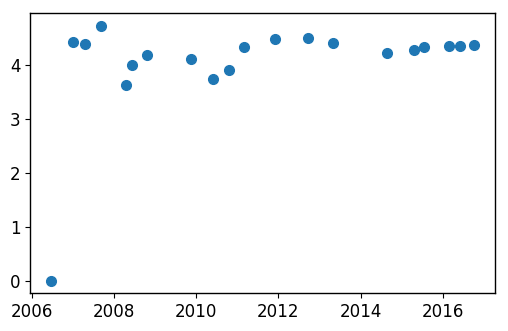

In [23]:
x = 'Michael Bisping'
ta = fights[fights.Winner == x][['Date', 'AveSlPM']]
plt.plot_date(ta.Date, ta.AveSlPM)

## Pull in more data sets

In [ ]:
iofile = 'data/ufc_name_education.csv'
ufc = pd.read_csv(iofile, header=0)
ufc.head(3)

In [ ]:
iofile = 'data/fightmetric_fighters_with_corrections_from_UFC_Wikipedia_CLEAN.csv'
fighters = pd.read_csv(iofile, header=0, parse_dates=['Dob'])
cols = ['Name', 'Height', 'Reach', 'LegReach', 'Stance', 'Dob']
df = fights.merge(fighters[cols], how='left', left_on='Winner', right_on='Name')
df = df.merge(fighters[cols], how='left', left_on='Loser', right_on='Name', suffixes=('', '_L'))
df = df.drop(['Name', 'Name_L'], axis=1)
df = df.merge(ufc, left_on='Winner', right_on='Name', how='left')
df = df.merge(ufc, left_on='Loser', right_on='Name', how='left', suffixes=('', '_L'))
df.Education = df.Education.fillna(0.0)
df.Education_L = df.Education_L.fillna(0.0)
df = df.drop(['Name', 'Name_L'], axis=1)
df.head(3)

iofile = 'data/fightmetric_career_stats.csv'
cstats = pd.read_csv(iofile, header=0)
cstats.head(3)

df = df.merge(cstats, left_on='Winner', right_on='Name', how='left')
df = df.merge(cstats, left_on='Loser', right_on='Name', how='left', suffixes=('', '_L'))

### More derived features

In [ ]:
df['Age'] = (df.Date - df.Dob) / np.timedelta64(1, 'Y')
df['Age_L'] = (df.Date - df.Dob_L) / np.timedelta64(1, 'Y')
df['AccDamageAbsorbed'] = df.AveSaPM * df.total_time
df['AccDamageAbsorbed_L'] = df.AveSaPM_L * df.total_time_L
df['AllStrikesThrownPM'] = df.AveSlPM / df.AveSigStrkAccuracy
df['AllStrikesThrownPM_L'] = df.AveSlPM_L / df.AveSigStrkAccuracy_L
# note that the quantities below depend on both fighters
df['ExpectedStrikesAbsorbedPM'] = df.AveSigStrkDefense * (df.AveSlPM_L / df.AveSigStrkAccuracy_L)
df['ExpectedStrikesAbsorbedPM_L'] = df.AveSigStrkDefense_L * (df.AveSlPM / df.AveSigStrkAccuracy)
df['TkoSuscept'] = np.sqrt(df.LTKO * df.WTKO_L)
df['TkoSuscept_L'] = np.sqrt(df.LTKO_L * df.WTKO)
df['SubSuscept'] = np.sqrt(df.LSUB * df.WSUB_L)
df['SubSuscept_L'] = np.sqrt(df.LSUB_L * df.WSUB)

In [ ]:
df.AllStrikesThrownPM = df.AllStrikesThrownPM.fillna(0.0)
df.AllStrikesThrownPM_L = df.AllStrikesThrownPM_L.fillna(0.0)

df.ExpectedStrikesAbsorbedPM = df.ExpectedStrikesAbsorbedPM.fillna(0.0)
df.ExpectedStrikesAbsorbedPM_L = df.ExpectedStrikesAbsorbedPM_L.fillna(0.0)

df.TkoSuscept = df.TkoSuscept.replace([np.inf, -np.inf], np.nan)
df.TkoSuscept_L = df.TkoSuscept_L.replace([np.inf, -np.inf], np.nan)
df.TkoSuscept = df.TkoSuscept.fillna(0.0)
df.TkoSuscept_L = df.TkoSuscept_L.fillna(0.0)

df.SubSuscept = df.SubSuscept.fillna(0.0)
df.SubSuscept_L = df.SubSuscept_L.fillna(0.0)

In [ ]:
cols = ['Name', 'Name_L', 'WeightClass', 'Method', 'MethodNotes', 'Round', 'Time', 'Event', 'Location']
cols2 = [u'Knockdowns', u'SigStrikesLanded', u'SigStrikesAttempted', u'TotStrikesLanded', u'TotStrikesAttempted', u'TakedownLanded', u'TakedownAttempted', u'SubsAttempted', u'Pass', u'Reversal', u'Knockdowns_L', u'SigStrikesLanded_L', u'SigStrikesAttempted_L', u'TotStrikesLanded_L', u'TotStrikesAttempted_L', u'TakedownLanded_L', u'TakedownAttempted_L', u'SubsAttempted_L', u'Pass_L', u'Reversal_L']
df = df.drop(cols+cols2, axis=1)

# Now inspect features

In [ ]:
df.info()

### Impute legreach using previously developed models

In [ ]:
# see leg_reach_model.ipynb
def impute_legreach(x):
     if (pd.isnull(x.LegReach) and pd.notnull(x.Reach) and pd.notnull(x.Height)): 
          return 0.16095475 * x.Reach + 0.42165158 * x.Height - 0.901274878
     elif (pd.isnull(x.LegReach) and pd.notnull(x.Height)):
          return 0.59770 * x.Height - 1.69697
     else:
          return x.LegReach

In [ ]:
def impute_legreach_L(x):
     if (pd.isnull(x.LegReach_L) and pd.notnull(x.Reach_L) and pd.notnull(x.Height_L)): 
          return 0.16095475 * x.Reach_L + 0.42165158 * x.Height_L - 0.901274878
     elif (pd.isnull(x.LegReach_L) and pd.notnull(x.Height_L)):
          return 0.59770 * x.Height_L - 1.69697
     else:
          return x.LegReach_L

In [ ]:
df.LegReach = df.apply(impute_legreach, axis=1)
df.LegReach_L = df.apply(impute_legreach_L, axis=1)

In [ ]:
def impute_reach(x):
     if (pd.isnull(x.Reach) and pd.notnull(x.Height)):
          return 1.093792 * x.Height - 4.94361
     else:
          return x.Reach

In [ ]:
def impute_reach_L(x):
     if (pd.isnull(x.Reach_L) and pd.notnull(x.Height_L)):
          return 1.093792 * x.Height_L - 4.94361
     else:
          return x.Reach_L

In [ ]:
df.Reach = df.apply(impute_reach, axis=1)
df.Reach_L = df.apply(impute_reach_L, axis=1)

In [ ]:
df.describe()

In [ ]:
df.info()

Filter fights to defeats since January 1, 2005:

In [ ]:
fs = df[(df.Date > pd.to_datetime('2005-01-01')) & (df.Outcome == 'def.')].copy()
fs.shape[0]

# Compute accuracy using simple rules

### Younger wins

In [ ]:
yw = fs[pd.notnull(fs.Dob) & pd.notnull(fs.Dob_L) & (fs.Dob != fs.Dob_L)]
wins = yw[yw.Dob > yw.Dob_L].shape[0]
total = yw.shape[0]
wins, total, wins / float(total), fs.shape[0] - total, 2 * binom.cdf(p=0.5, k=min(wins, total - wins), n=total)

### Longer reach wins

In [ ]:
lr = fs[pd.notnull(fs.Reach) & pd.notnull(fs.Reach_L) & (fs.Reach != fs.Reach_L)]
wins = lr[lr.Reach > lr.Reach_L].shape[0]
total = lr.shape[0]
wins, total, wins / float(total), fs.shape[0] - total, 2 * binom.cdf(p=0.5, k=min(wins, total - wins), n=total)

What if we don't exclude nulls?

In [ ]:
lr = fs[fs.Reach != fs.Reach_L]
wins = lr[lr.Reach > lr.Reach_L].shape[0]
total = lr.shape[0]
wins, total, wins / float(total), fs.shape[0] - total

In [ ]:
71.0 > np.nan

In [ ]:
71.0 == np.nan

In [ ]:
lr[['Reach', 'Reach_L']].info()

We see that nulls in Reach_L lead to Falses which increased the total which gave a win ratio less than 1/2.

### Taller wins

In [ ]:
ht = fs[pd.notnull(fs.Height) & pd.notnull(fs.Height_L) & (fs.Height != fs.Height_L)]
wins = ht[ht.Height > ht.Height_L].shape[0]
total = ht.shape[0]
wins, total, wins / float(total), fs.shape[0] - total, 2 * binom.cdf(p=0.5, k=min(wins, total - wins), n=total)

### Stance

In [ ]:
st = fs[pd.notnull(fs.Stance) & pd.notnull(fs.Stance_L) & (((fs.Stance == 'Orthodox') & (fs.Stance_L == 'Southpaw')) | ((fs.Stance == 'Southpaw') & (fs.Stance_L == 'Orthodox')))]
wins = st[st.Stance == 'Southpaw'].shape[0]
total = st.shape[0]
wins, total, wins / float(total), fs.shape[0] - total, 2 * binom.cdf(p=0.5, k=min(wins, total - wins), n=total)

### Education

In [ ]:
ed = fs[pd.notnull(fs.Education) & pd.notnull(fs.Education_L) & (fs.Education != fs.Education_L)]
wins = ed[ed.Education == 1].shape[0]
total = ed.shape[0]
wins, total, wins / float(total), fs.shape[0] - total, 2 * binom.cdf(p=0.5, k=min(wins, total - wins), n=total)

### Leg reach

In [ ]:
lg = fs[pd.notnull(fs.LegReach) & pd.notnull(fs.LegReach_L) & (fs.LegReach != fs.LegReach_L)]
wins = lg[lg.LegReach > lg.LegReach_L].shape[0]
total = lg.shape[0]
wins, total, wins / float(total), fs.shape[0] - total, 2 * binom.cdf(p=0.5, k=min(wins, total - wins), n=total)

### Predict winner has more UFC fights

In [ ]:
nf = fs[pd.notnull(fs.NumFights) & pd.notnull(fs.NumFights_L) & (fs.NumFights != fs.NumFights_L)]
wins = nf[nf.NumFights > nf.NumFights_L].shape[0]
total = nf.shape[0]
wins, total, wins / float(total), fs.shape[0] - total, 2 * binom.cdf(p=0.5, k=min(wins, total - wins), n=total)

### Predict winner has higher win ratio (for 5 fights or more)

In [ ]:
wr = fs[pd.notnull(fs.WinRatio) & pd.notnull(fs.WinRatio_L) & (fs.WinRatio != fs.WinRatio_L) & (fs.NumFights > 4) & (fs.NumFights_L > 4)]
wins = wr[wr.WinRatio > wr.WinRatio_L].shape[0]
total = wr.shape[0]
wins, total, wins / float(total), fs.shape[0] - total, 2 * binom.cdf(p=0.5, k=min(wins, total - wins), n=total)

In [ ]:
# How does the result change if we replace NaN with 0.5 and don't require a certain number of fights?
# Ans: (1571, 2728, 0.5758797653958945, 833, 2.331962646952389e-15)
#fs.WinRatio = fs.WinRatio.fillna(0.5)
#fs.WinRatio_L = fs.WinRatio_L.fillna(0.5)

### Fighter who fought more recently wins

In [ ]:
vd = fs[pd.notnull(fs.TimeSince) & pd.notnull(fs.TimeSince_L) & (fs.TimeSince != fs.TimeSince_L)]

wins = vd[vd.TimeSince < vd.TimeSince_L].shape[0]
total = vd.shape[0]
wins, total, wins / float(total), fs.shape[0] - total, 2 * binom.cdf(p=0.5, k=min(wins, total - wins), n=total)

### Current or former champion wins

In [ ]:
vd = fs[pd.notnull(fs.Champ) & pd.notnull(fs.Champ_L) & (fs.Champ != fs.Champ_L)]

wins = vd[vd.Champ == 1].shape[0]
total = vd.shape[0]
wins, total, wins / float(total), fs.shape[0] - total, 2 * binom.cdf(p=0.5, k=min(wins, total - wins), n=total)

### Higher win ratio and younger

In [ ]:
vd = fs[pd.notnull(fs.WinRatio) & pd.notnull(fs.WinRatio_L) & pd.notnull(fs.Dob) & pd.notnull(fs.Dob_L) & (fs.WinRatio != fs.WinRatio_L) & (fs.Dob != fs.Dob_L) & (fs.NumFights > 4) & (fs.NumFights_L > 4)]
msk1 = (vd.WinRatio > vd.WinRatio_L) & (vd.Dob > vd.Dob_L)
msk2 = (vd.WinRatio < vd.WinRatio_L) & (vd.Dob < vd.Dob_L)

sp = vd[msk1 | msk2]
wins = sp[sp.WinRatio > sp.WinRatio_L].shape[0]
total = sp.shape[0]
wins, total, wins / float(total), fs.shape[0] - total, 2 * binom.cdf(p=0.5, k=min(wins, total - wins), n=total)

### Reach advantage of 4 inches or more

In [ ]:
vd = fs[pd.notnull(fs.Reach) & pd.notnull(fs.Reach_L)]
msk1 = np.abs(vd.Reach - vd.Reach_L) >= 4

sp = vd[msk1]
wins = sp[(sp.Reach > sp.Reach_L)].shape[0]
total = sp.shape[0]
wins, total, wins / float(total), fs.shape[0] - total, 2 * binom.cdf(p=0.5, k=min(wins, total - wins), n=total)

In [ ]:
sp[['Winner', 'Reach', 'Loser', 'Reach_L']].head(10)

### 4 years or more younger

In [ ]:
vd = fs[pd.notnull(fs.Dob) & pd.notnull(fs.Dob_L)]
msk1 = ((vd.Dob - vd.Dob_L) / np.timedelta64(1, 'Y'))**2 >= 16

sp = vd[msk1]
wins = sp[(sp.Dob > sp.Dob_L)].shape[0]
total = sp.shape[0]
wins, total, wins / float(total), fs.shape[0] - total, 2 * binom.cdf(p=0.5, k=min(wins, total - wins), n=total)

In [ ]:
sp[['Winner', 'Dob', 'Loser', 'Dob_L']].head(20)

### Younger and greater reach

In [ ]:
vd = fs[pd.notnull(fs.Dob) & pd.notnull(fs.Dob_L) & pd.notnull(fs.Reach) & pd.notnull(fs.Reach_L)]
msk1 = (vd.Reach > vd.Reach_L) & (vd.Dob > vd.Dob_L)
msk2 = (vd.Reach < vd.Reach_L) & (vd.Dob < vd.Dob_L)

sp = vd[msk1 | msk2]
wins = sp[(sp.Dob > sp.Dob_L) & (sp.Reach > sp.Reach_L)].shape[0]
total = sp.shape[0]
wins, total, wins / float(total), fs.shape[0] - total, 2 * binom.cdf(p=0.5, k=min(wins, total - wins), n=total)

### Southpaw and younger

In [ ]:
vd = fs[pd.notnull(fs.Stance) & pd.notnull(fs.Stance_L) & pd.notnull(fs.Dob) & pd.notnull(fs.Dob_L)]
msk1 = (vd.Stance == 'Southpaw') & (vd.Stance_L == 'Orthodox') & (vd.Dob > vd.Dob_L)
msk2 = (vd.Stance == 'Orthodox') & (vd.Stance_L == 'Southpaw') & (vd.Dob < vd.Dob_L)

sp = vd[msk1 | msk2]
wins = sp[sp.Stance == 'Southpaw'].shape[0]
total = sp.shape[0]
wins, total, wins / float(total), fs.shape[0] - total, 2 * binom.cdf(p=0.5, k=min(wins, total - wins), n=total)

### South, younger and greater reach

In [ ]:
vd = fs[pd.notnull(fs.Stance) & pd.notnull(fs.Stance_L) & pd.notnull(fs.Dob) & pd.notnull(fs.Dob_L) & pd.notnull(fs.Reach) & pd.notnull(fs.Reach_L)]
msk1 = (vd.Stance == 'Southpaw') & (vd.Stance_L == 'Orthodox') & (vd.Reach > vd.Reach_L) & (vd.Dob > vd.Dob_L)
msk2 = (vd.Stance == 'Orthodox') & (vd.Stance_L == 'Southpaw') & (vd.Reach < vd.Reach_L) & (vd.Dob < vd.Dob_L)

sp = vd[msk1 | msk2]
wins = sp[sp.Stance == 'Southpaw'].shape[0]
total = sp.shape[0]
wins, total, wins / float(total), fs.shape[0] - total, 2 * binom.cdf(p=0.5, k=min(wins, total - wins), n=total)

In [ ]:
sp[['Winner', 'Dob', 'Reach', 'Stance', 'Loser', 'Dob_L', 'Reach_L', 'Stance_L']].head()

### Overall win ratio

In [ ]:
fs_fighters = fs.Winner.append(fs.Loser).value_counts().to_frame()
wins = fs.Winner.value_counts().to_frame()
loses = fs.Loser.value_counts().to_frame()
fs_fighters = fs_fighters.merge(wins, left_index=True, right_index=True, how='left')
fs_fighters = fs_fighters.merge(loses, left_index=True, right_index=True, how='left')
fs_fighters = fs_fighters.fillna(0.0)
fs_fighters.columns = ['Total', 'Wins', 'Losses']
fs_fighters['WinRatio'] = fs_fighters.Wins / (fs_fighters.Wins + fs_fighters.Losses)

In [ ]:
ws = fs.merge(fs_fighters[['Total', 'WinRatio']], left_on='Winner', right_index=True, how='left')
ws = ws.merge(fs_fighters[['Total', 'WinRatio']], left_on='Loser', right_index=True, how='left', suffixes=('', '_L'))
ws.head(3)

In [ ]:
ws = ws[pd.notnull(ws.WinRatio) & pd.notnull(ws.WinRatio_L) & (ws.Total > 5) & (ws.Total_L > 5)]
wins = ws[ws.WinRatio > ws.WinRatio_L].shape[0]
total = ws.shape[0]
wins, total, wins / float(total), ws.shape[0] - total

# Part II: Cleaning, imputing and standardizing

In [ ]:
fs.info()

### Replace stance with numerical values (ordinal)

In [ ]:
fs.Stance.value_counts()

In [ ]:
fs.Stance_L.value_counts()

In [ ]:
gs = fs[fs.Stance.isin(['Southpaw', 'Orthodox', 'Switch']) & fs.Stance_L.isin(['Southpaw', 'Orthodox', 'Switch'])].copy()

In [ ]:
gs.Stance = gs.Stance.replace({'Switch':0}).replace({'Southpaw':1, 'Orthodox':-1})
gs.Stance_L = gs.Stance_L.replace({'Switch':0}).replace({'Southpaw':1, 'Orthodox':-1})

In [ ]:
gs.dropna().to_csv('data/feature_matrix_before.csv', index=False)

In [ ]:
cols = set(gs.columns)
cols = cols - set(['Winner', 'Loser', 'Outcome', 'Date', 'Minutes', 'Dob', 'Dob_L'])
cols = list(cols)

In [ ]:
gs = gs[cols].dropna()

In [ ]:
gs.info()

In [ ]:
win_cols = sorted(filter(lambda x: not x.endswith('_L'), cols))
los_cols = sorted(filter(lambda x: x.endswith('_L'), cols))
gs = gs[win_cols + los_cols]

In [ ]:
gs.info()

In [ ]:
fig, axs = plt.subplots(nrows=31, ncols=2, figsize=(8, 80))
for i, (axi, axj) in enumerate(axs):
     axi.hist(gs[win_cols[i]])
     axi.set_xlabel(win_cols[i])
     axj.hist(gs[los_cols[i]])
     axj.set_xlabel(los_cols[i])
plt.tight_layout()

Generate all possible differences:

In [ ]:
for column in win_cols:
     exec('gs[\'' + column + 'Diff\'] = gs.' + column + ' - ' + 'gs.' + column + '_L')

In [ ]:
gs.describe()

In [ ]:
gs.corr().applymap(lambda x: abs(round(x, 2)))

In [ ]:
gs.to_csv('data/feature_matrix.csv')

In [ ]:
shuffled = []
from random import random as rng
for index, row in gs.iterrows():
     if (rng() < 0.5):
          shuffled.append(([1] + list(row[31:62].values) + list(row[0:31].values) + list(-1 * row[62:].values)))
     else:
          shuffled.append(([0] + list(row.values)))

In [ ]:
columns = ['classes'] + [col + '_1' for col in win_cols] + [col + '_2' for col in win_cols] + [col + '_12' for col in win_cols]
data = pd.DataFrame(shuffled, columns=columns)
data.describe()

In [ ]:
sorted(data.corr().applymap(lambda x: abs(round(x, 2))).values.flatten().tolist(), reverse=True)[:15]

In [ ]:
data = data.sample(data.shape[0], replace=False, axis=0)
data.info()

In [ ]:
plt.scatter(data[data.classes==0].slpm_12, data[data.classes==0].classes, marker='+')
plt.scatter(data[data.classes==1].slpm_12, data[data.classes==1].classes, marker='_')